In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from tfmap import Atlus

Parsing spectra: 100%|██████████| 6732/6732 [02:58<00:00, 37.66it/s] 


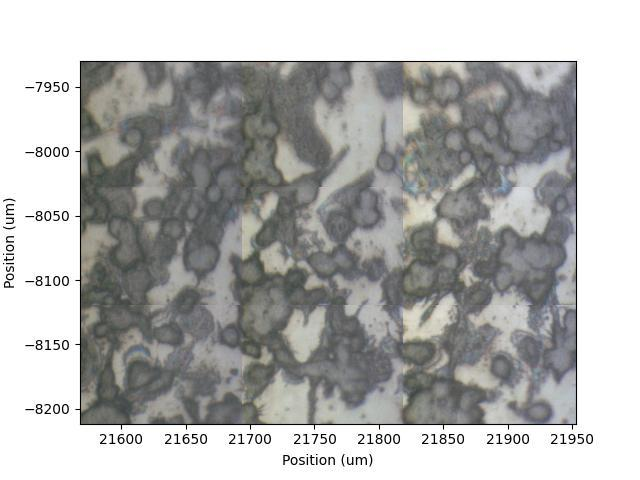

In [ ]:
atlus = Atlus.from_map_filepath("../data/test.map")
atlus

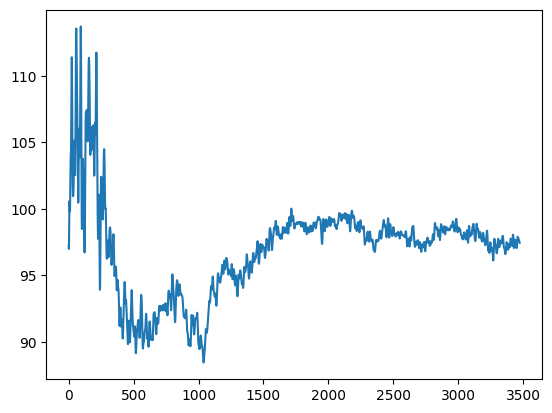

In [8]:
import matplotlib.pyplot as plt

sample = atlus.spectra()[1234]
plt.plot(sample)